In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Tesi/

/content/drive/MyDrive/Tesi


In [ ]:
cd ..

/content/drive/My Drive/Tesi


In [ ]:
!git clone https://github.com/Stveshawn/contextual_topic_identification.git

Cloning into 'contextual_topic_identification'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 259 (delta 29), reused 24 (delta 6), pack-reused 176
Receiving objects: 100% (259/259), 58.89 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
cd contextual_topic_identification

/content/drive/MyDrive/Tesi/contextual_topic_identification


In [ ]:
ls

'=1.18.1'   docker_build_run.sh   LICENSE     requirements.txt
 build/     Dockerfile            model/      test.sh
 data/      docs/                 README.md   train.csv


In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install stop_words
!pip install language_detector
!pip install sklearn
!pip install symspellpy
!pip install gensim
!pip install wordcloud
!pip install tensorflow
!pip install keras
!pip install sentence-transformers
!pip install umap-learn
!pip install nltk
!pip install umap-learn
!pip install hdbscan

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32917 sha256=727763aa43a1362dbba857652bf43540451e15c066e21a1497916fdb6a3601c1
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
  Created wheel for language-detector: filename=language_detector-5.0.2-cp37-none-any.whl size=7054 sha256=3586f2862a721b334ae7c4cc1818674c4846f548074ca17397e7e20c3924976d
  Stored in directory: /root/.cache/pip/wheels/7d/37/fa/2098a4aa6c0d94d6ddff0d3a79669e12bc4f7baca8a760b3db
Successfully built language-detector
     |████████████████████████████████| 2.6MB 8.7MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 2.0MB 7.3MB/s 
     |████████████████████████████████| 1.2MB 35.5MB/s 
     |████████████████████████████████| 890kB 48.7MB/s 
     |████████████████████████████████| 3.2MB 55.3MB/s 
  Created wheel for sentence-transformers: filename=

In [ ]:
!python -m spacy download it_core_news_sm

     |████████████████████████████████| 14.5MB 11.3MB/s 
  Created wheel for it-core-news-sm: filename=it_core_news_sm-2.2.5-cp37-none-any.whl size=14471131 sha256=70b87fa475f6ad6726ef86d6638c044ed2d0dd81605e2273e7b2395a44372ff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dty8vu8/wheels/a1/01/c2/127ab92cc5e3c7f36b5cd4bff28d1c29c313962a2ba913e720
Successfully built it-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')


# Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
newsgroups_train = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
dataset = newsgroups_train.data
original_labels = newsgroups_train.target
df = pd.DataFrame(dataset, columns=['text']) 
df['original_labels'] = original_labels
df = df[df.text != '']
df = df.reset_index()

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
df.columns = ['text', 'target']

In [ ]:
df

,text,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [ ]:
import pandas as pd
import numpy as np

f = open('gov_ita2.json',) 
df = pd.read_json(f)
df = df[df.text != '']
df.sort_values("text", inplace = True) 
df.drop_duplicates(subset ="text", keep = False, inplace = True)
df.reset_index(drop=True, inplace=True)

In [ ]:
import pandas as pd
import numpy as np

f = open('gov_uk_10000.json',) 
df = pd.read_json(f)
df = df[df.text != '']
df.drop_duplicates(subset ="text", keep = False, inplace = True)
df = df.reset_index()

In [ ]:
import pandas as pd
import numpy as np

f = open('gov_uk2.json',) 
df = pd.read_json(f)
df = df[df.text != '']
df.drop_duplicates(subset ="text", keep = False, inplace = True)
df = df.reset_index()

In [ ]:
df

,index,date,title,link,text
0,1,2021-03-04,Project Servator goes live at Heysham – trust ...,https://www.gov.uk/government/news/project-ser...,Project Servator tactics are used by 23 UK pol...
1,3,2021-03-04,Change of Her Majesty’s Ambassador to Chad: Ma...,https://www.gov.uk/government/news/change-of-h...,Mr Mark Matthews has been appointed Her Majest...
2,4,2021-03-04,Jeff Halliwell appointed Chair of the Coal Aut...,https://www.gov.uk/government/news/jeff-halliw...,Jeff Halliwell has been appointed as Chair of ...
3,5,2021-03-04,Change of British High Commissioner to Cameroo...,https://www.gov.uk/government/news/change-of-b...,Dr Christian Dennys-McClure has been appointed...
4,6,2021-03-04,Alok Sharma welcomes UK-Bangladesh Climate Par...,https://www.gov.uk/government/news/alok-sharma...,During the last session of the UK-Bangladesh C...
...,...,...,...,...,...
18163,19995,2018-10-05,FCO Press Release: Minister for the Middle Ea...,https://www.gov.uk/government/news/fco-press-r...,"The Joint Working Group, which takes place on ..."
18164,19996,2018-10-05,African swine fever risk reminder,https://www.gov.uk/government/news/african-swi...,Read the guidance on for the latest informat...
18165,19997,2018-10-05,Using the PHSKF to merge public health teams,https://www.gov.uk/government/case-studies/usi...,In Spring 2017 it was agreed that the Bedford ...
18166,19998,2018-10-05,Baroness Stowell: The Future of Charity,https://www.gov.uk/government/speeches/barones...,"Good evening, I’m delighted to be here, and I ..."


In [ ]:
document_lengths = np.array(list(map(len, df.text.str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 529.3028952003523.
The minimum number of words in a document is: 1.
The maximum number of words in a document is: 8655.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


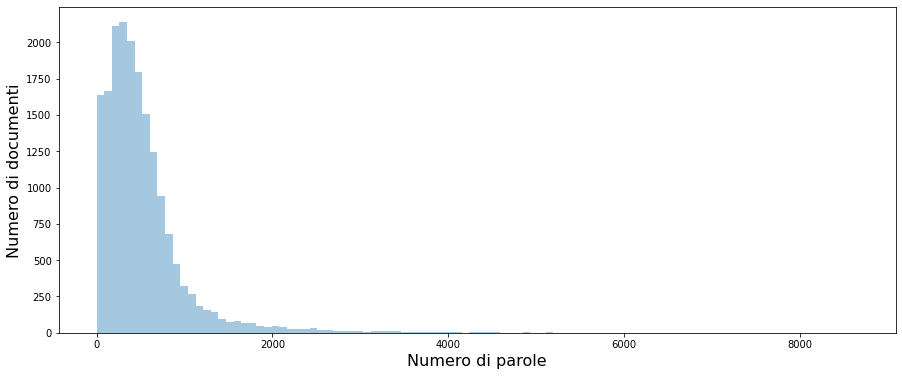

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))

ax.set_xlabel("Numero di parole", fontsize=16)
ax.set_ylabel("Numero di documenti", fontsize=16)
sns.distplot(document_lengths, bins=100, ax=ax, hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  )

In [ ]:
# Tokenize the texts

# find and remove non-ascii words
# I stored our special word in a variable for later use
our_special_word = 'qwerty'

def remove_ascii_words(df):
    """ 
    removes non-ascii characters from the 'texts' column in df.
    It returns the words containig non-ascii characers.
    """
    non_ascii_words = []
    for i in range(len(df)):
        for word in df.loc[i, 'text'].split(' '):
            if any([ord(character) >= 128 for character in word]):
                non_ascii_words.append(word)
                df.loc[i, 'text'] = df.loc[i, 'text'].replace(word, our_special_word)
    return non_ascii_words

non_ascii_words = remove_ascii_words(df)

print("Replaced {} words with characters with an ordinal >= 128 in the train data.".format(
    len(non_ascii_words)))

def get_good_tokens(sentence):
    replaced_punctation = list(map(lambda token: re.sub('[^0-9A-Za-z!?]+', '', token), sentence))
    removed_punctation = list(filter(lambda token: token, replaced_punctation))
    return removed_punctation

Replaced 161496 words with characters with an ordinal >= 128 in the train data.


In [ ]:
# more common imports
import pandas as pd
import numpy as np
from collections import Counter
import re

# languange processing imports
import nltk
from gensim.corpora import Dictionary
# preprocessing imports
from sklearn.preprocessing import LabelEncoder

# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Here we get transform the documents into sentences for the word2vecmodel
# we made a function such that later on when we make the submission, we don't need to write duplicate code
def w2v_preprocessing(df):
    """ 
    All the preprocessing steps for word2vec are done in this function.
    All mutations are done on the dataframe itself. So this function returns
    nothing.
    """
    df['text'] = df.text.str.lower()
    df['document_sentences'] = df.text.str.split('.')  # split texts into individual sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(nltk.word_tokenize, sentences)),
                                         df.document_sentences))  # tokenize sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(get_good_tokens, sentences)),
                                         df.tokenized_sentences))  # remove unwanted characters
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(filter(lambda lst: lst, sentences)),
                                         df.tokenized_sentences))  # remove empty lists

w2v_preprocessing(df)

In [ ]:
df

,index,date,title,link,text,document_sentences,tokenized_sentences
0,1,2021-03-04,Project Servator goes live at Heysham – trust ...,https://www.gov.uk/government/news/project-ser...,project servator tactics are used by 23 uk pol...,[project servator tactics are used by 23 uk po...,"[[project, servator, tactics, are, used, by, 2..."
1,3,2021-03-04,Change of Her Majesty’s Ambassador to Chad: Ma...,https://www.gov.uk/government/news/change-of-h...,mr mark matthews has been appointed her qwerty...,[mr mark matthews has been appointed her qwert...,"[[mr, mark, matthews, has, been, appointed, he..."
2,4,2021-03-04,Jeff Halliwell appointed Chair of the Coal Aut...,https://www.gov.uk/government/news/jeff-halliw...,jeff halliwell has been appointed as chair of ...,[jeff halliwell has been appointed as chair of...,"[[jeff, halliwell, has, been, appointed, as, c..."
3,5,2021-03-04,Change of British High Commissioner to Cameroo...,https://www.gov.uk/government/news/change-of-b...,dr christian dennys-mcclure has been appointed...,[dr christian dennys-mcclure has been appointe...,"[[dr, christian, dennysmcclure, has, been, app..."
4,6,2021-03-04,Alok Sharma welcomes UK-Bangladesh Climate Par...,https://www.gov.uk/government/news/alok-sharma...,during the last session of the uk-bangladesh c...,[during the last session of the uk-bangladesh ...,"[[during, the, last, session, of, the, ukbangl..."
...,...,...,...,...,...,...,...
18163,19995,2018-10-05,FCO Press Release: Minister for the Middle Ea...,https://www.gov.uk/government/news/fco-press-r...,"the joint working group, which takes place on ...","[the joint working group, which takes place on...","[[the, joint, working, group, which, takes, pl..."
18164,19996,2018-10-05,African swine fever risk reminder,https://www.gov.uk/government/news/african-swi...,read the guidance on for the latest informat...,[read the guidance on for the latest informa...,"[[read, the, guidance, on, for, the, latest, i..."
18165,19997,2018-10-05,Using the PHSKF to merge public health teams,https://www.gov.uk/government/case-studies/usi...,in spring 2017 it was agreed that the bedford ...,[in spring 2017 it was agreed that the bedford...,"[[in, spring, 2017, it, was, agreed, that, the..."
18166,19998,2018-10-05,Baroness Stowell: The Future of Charity,https://www.gov.uk/government/speeches/barones...,"good evening, qwerty delighted to be here, and...","[good evening, qwerty delighted to be here, an...","[[good, evening, qwerty, delighted, to, be, he..."


In [ ]:
def lda_get_good_tokens(df):
    df['text'] = df.text.str.lower()
    df['tokenized_text'] = list(map(nltk.word_tokenize, df.text))
    df['tokenized_text'] = list(map(get_good_tokens, df.tokenized_text))

lda_get_good_tokens(df)

In [ ]:
tokenized_only_dict = Counter(np.concatenate(df.tokenized_text.values))

tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
tokenized_only_df.rename(columns={0: 'count'}, inplace=True)

In [ ]:
tokenized_only_df

,count
project,5812
servator,73
tactics,118
are,60273
used,4021
...,...
fleetoffoot,1
vms,1
gprs,1
peasholme,1


In [ ]:
tokenized_only_df.sort_values('count', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


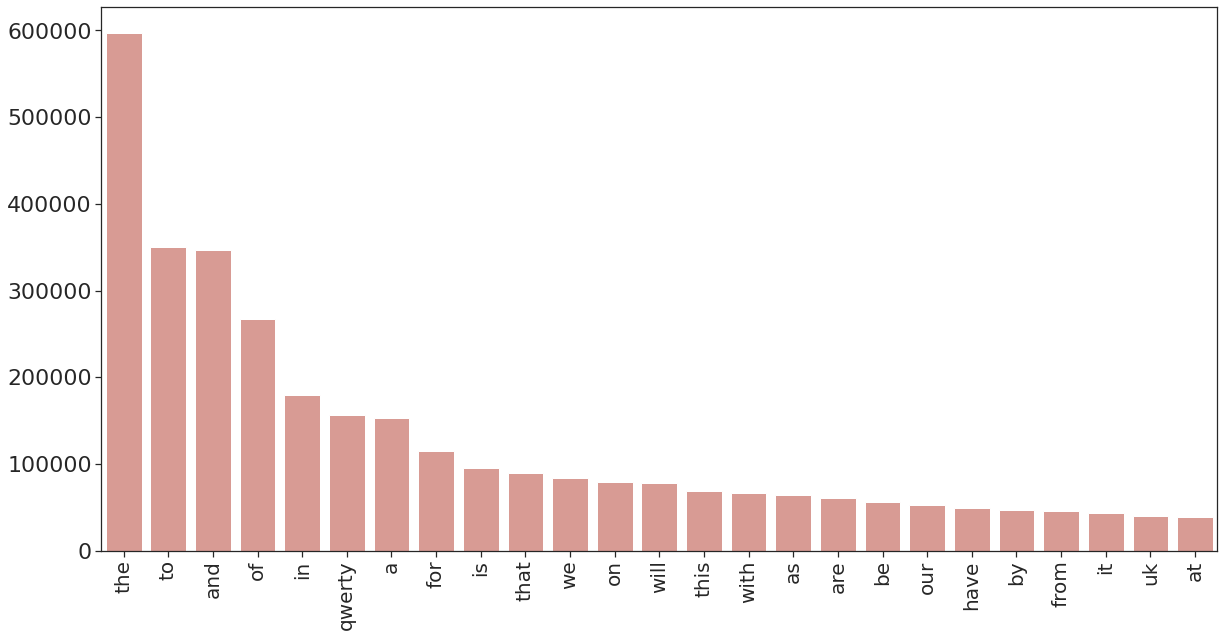

In [ ]:
def word_frequency_barplot(df, nr_top_words=25):
    """ 
    df should have a column named count.
    """
    sns.set(font_scale = 2)
    sns.set_style("ticks")
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.rcParams["axes.labelsize"] = 15
    sns.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words], ax=ax,color='salmon', saturation=.5, label='big')

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=20, rotation=90)
    return ax
    
    
ax = word_frequency_barplot(tokenized_only_df)

# Preprocessing

In [ ]:
!python -m spacy download it_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')


## Italiano

In [ ]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import re
import nltk
from nltk.tokenize import word_tokenize
from language_detector import detect_language

import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "it-100k.txt")
if sym_spell.word_count:
    pass
else:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
import spacy
from spacy.lang.it.examples import sentences 
from nltk.stem.snowball import SnowballStemmer
import spacy
from spacy.lang.it.examples import sentences 

###################################
#### sentence level preprocess ####
###################################

# lowercase + base filter
# some basic normalization
def f_base(s):
    """
    :param s: string to be processed
    :return: processed string: see comments in the source code for more info
    """
    # normalization 1: xxxThis is a --> xxx. This is a (missing delimiter)
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s)  # before lower case
    # normalization 2: lower case
    s = s.lower()
    # normalization 3: "&gt", "&lt"
    s = re.sub(r'&gt|&lt', ' ', s)
    # normalization 4: letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # normalization 5: non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # normalization 6: string * as delimiter
    s = re.sub(r'\*|\W\*|\*\W', '. ', s)
    # normalization 7: stuff in parenthesis, assumed to be less informal
    s = re.sub(r'\(.*?\)', '. ', s)
    # normalization 8: xxx[?!]. -- > xxx.
    s = re.sub(r'\W+?\.', '.', s)
    # normalization 9: [.?!] --> [.?!] xxx
    s = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', s)
    return s.strip()

###############################
#### word level preprocess ####
###############################

# filtering out punctuations and numbers
def f_punct(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with punct and number filter out
    """
    return [word for word in w_list if word.isalpha()]  #returns True if all the characters are alphabet letters (a-z).

import it_core_news_sm
nlp2 = it_core_news_sm.load()
# selecting nouns
def f_noun(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with only nouns selected
    """
    words = []
    for i in w_list:
      for token in nlp2(i):
        if token.pos_ == 'NOUN':
          words.append(i)
    return words

# typo correction
def f_typo(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    w_list_fixed = []
    for word in w_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
        if suggestions:
            w_list_fixed.append(suggestions[0].term)
        else:
            pass
            # do word segmentation, deprecated for inefficiency
            # w_seg = sym_spell.word_segmentation(phrase=word)
            # w_list_fixed.extend(w_seg.corrected_string.split())
    return w_list_fixed


# stemming if doing word-wise
p_stemmer = SnowballStemmer("italian")
def f_stem(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with stemming
    """
    return [p_stemmer.stem(word) for word in w_list]


# filtering out stop words
# create English stop words list
en_stop = get_stop_words('italian')

def f_stopw(w_list):
    """
    filtering out stop words
    """
    return [word for word in w_list if word not in en_stop]


def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw review texts
    :param rw: review to be processed
    :return: sentence level pre-processed review
    """
    s = f_base(rw)
    #if not f_lan(s):
        #return None
    return s


def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """
    if not s:
        return None

    # import WhitespaceTokenizer() method from nltk 
    from nltk.tokenize import WhitespaceTokenizer 
        
    # Create a reference variable for Class WhitespaceTokenizer 
    tk = WhitespaceTokenizer() 
        
  
        
    # Use tokenize method 
    w_list = tk.tokenize(s) #word_tokenize(s, language='italian')
    w_list = f_punct(w_list)
    w_list = f_noun(w_list)
    #w_list = f_typo(w_list)
    w_list = f_stem(w_list)
    w_list = f_stopw(w_list)
    return w_list

## Inglese

In [ ]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import re
import nltk
from nltk.tokenize import word_tokenize
from language_detector import detect_language

import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
if sym_spell.word_count:
    pass
else:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)


###################################
#### sentence level preprocess ####
###################################

# lowercase + base filter
# some basic normalization
def f_base(s):

    # normalization 1: xxxThis is a --> xxx. This is a (missing delimiter)
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s)  # before lower case
    # normalization 2: lower case
    s = s.lower()
    # normalization 3: "&gt", "&lt"
    s = re.sub(r'&gt|&lt', ' ', s)
    # normalization 4: letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # normalization 5: non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # normalization 6: string * as delimiter
    s = re.sub(r'\*|\W\*|\*\W', '. ', s)
    # normalization 7: stuff in parenthesis, assumed to be less informal
    s = re.sub(r'\(.*?\)', '. ', s)
    # normalization 8: xxx[?!]. -- > xxx.
    s = re.sub(r'\W+?\.', '.', s)
    # normalization 9: [.?!] --> [.?!] xxx
    s = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', s)
    # normalization 10: ' ing ', noise text
    s = re.sub(r' ing ', ' ', s)

    return s.strip()


###############################
#### word level preprocess ####
###############################

# filtering out punctuations and numbers
def f_punct(w_list):
    """
    ritorno le parole che contengono solamente delle lettere
    """
    return [word for word in w_list if word.isalpha()]


# selecting nouns
def f_noun(w_list):
    """
    ritorno solamente le parole che sono nomi
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']


# typo correction
def f_typo(w_list):
    """
    corregge le parole scritte con errori
    :param w_list: word list to be processed
    :return: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    w_list_fixed = []
    for word in w_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
        if suggestions:
            w_list_fixed.append(suggestions[0].term)
        else:
            pass
            # do word segmentation, deprecated for inefficiency
            # w_seg = sym_spell.word_segmentation(phrase=word)
            # w_list_fixed.extend(w_seg.corrected_string.split())
    return w_list_fixed


# stemming if doing word-wise
p_stemmer = PorterStemmer()


def f_stem(w_list):
    """
    stemming delle parole
    """
    return [p_stemmer.stem(word) for word in w_list]


# filtering out stop words
# create English stop words list
en_stop = get_stop_words('en')
def f_stopw(w_list):
    """
    rimuovo le stop words
    """
    return [word for word in w_list if word not in en_stop]


def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw review texts
    :param rw: review to be processed
    :return: sentence level pre-processed review
    """
    s = f_base(rw)
    return s


def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    w_list = f_punct(w_list)
    w_list = f_noun(w_list)
    #w_list = f_typo(w_list)
    w_list = f_stem(w_list)
    w_list = f_stopw(w_list)

    return w_list

# LDA + BERT

## Autoencoder

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

## MODEL

### KMEANS

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import numpy as np
from datetime import datetime

def preprocess_tokens(tokens, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(tokens)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    samp = list(range(n_docs))
    indexes_to_drop = []
    #samp = np.random.choice(n_docs, samp_size)
    for i, idx in enumerate(samp):
        token_list = preprocess_word(tokens[idx])
        if token_list:
            idx_in.append(idx)
            sentences.append(tokens[idx])
            token_lists.append(token_list)
        else: 
          indexes_to_drop.append(i)
        print('{} %'.format(str(np.round((i + 1) / len(samp) * 100, 2))), end='\r')

    df.drop(df.index[indexes_to_drop], inplace=True )
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in, df

def preprocess(df, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(df.text)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    samp = list(range(n_docs))
    indexes_to_drop = []
    #samp = np.random.choice(n_docs, samp_size)
    for i, idx in enumerate(samp):
        print(str(i) + "/" + str(len(samp)))
        sentence = preprocess_sent(df.text[idx])
        token_list = preprocess_word(sentence)
        if token_list:
            idx_in.append(idx)
            sentences.append(sentence)
            token_lists.append(token_list)
        else: 
          indexes_to_drop.append(i)
        print('{} %'.format(str(np.round((i + 1) / len(samp) * 100, 2))), end='\r')

    df.drop(df.index[indexes_to_drop], inplace=True )
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in, df


# define model object
class Topic_Model:
    def __init__(self, k=10, method='TFIDF', gamma=10):
        """
        :param k: number of topics
        :param method: method chosen for the topic model
        """
        if method not in {'TFIDF', 'LDA', 'BERT', 'LDA_BERT'}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        #         self.stopwords = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = gamma  # parameter for reletive importance of lda
        self.method = method
        self.AE = None
        self.id = method + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

    def vectorize(self, sentences, token_lists, method=None):
        """
        Get vecotr representations from selected methods
        """
        # Default method
        if method is None:
            method = self.method

        # turn tokenized documents into a id <-> term dictionary
        self.dictionary = corpora.Dictionary(token_lists)
        # convert tokenized documents into a document-term matrix
        self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'TFIDF':
            print('Getting vector representations for TF-IDF ...')
            tfidf = TfidfVectorizer()
            vec = tfidf.fit_transform(sentences)
            print('Getting vector representations for TF-IDF. Done!')
            return vec

        elif method == 'LDA':
            print('Getting vector representations for LDA ...')
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)

            def get_vec_lda(model, corpus, k):
                """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
                """
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob

                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print('Getting vector representations for LDA. Done!')
            return vec

        elif method == 'BERT':

            print('Getting vector representations for BERT ...')

            from sentence_transformers import SentenceTransformer, models
            from torch import nn
            #word_embedding_model = models.Transformer('tmp/distilbert-base-uncased_gov_uk2_20000')
            #word_embedding_model = models.Transformer('tmp/distilbert-base-uncased_gov_uk_10000')
            #word_embedding_model = models.Transformer('tmp/distilbert-base-uncased_gov_ita_10000') #coerenza 0.462
            #word_embedding_model = models.Transformer('bert-base-multilingual-cased')
            #pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_cls_token=True, pooling_mode_max_tokens=False, pooling_mode_mean_tokens=False)
            #model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
            from sentence_transformers import SentenceTransformer
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_max_token_2_continue')
            #model = SentenceTransformer('tmp/bert-base-uncased_max_token_2_continue')
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_max_token_continue')
            model = SentenceTransformer('tmp/distilbert-base-uncased_20newsgroup')
            #model = SentenceTransformer('bert-base-nli-max-tokens')
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_gov_uk_10000_continue') #coerenza 0.44
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_continue')
            
            vec = np.array(model.encode(sentences, show_progress_bar=True))
            print('Getting vector representations for BERT. Done!')
            return vec

        #         elif method == 'LDA_BERT':
        else:
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            print(vec_lda.shape)
            print(vec_bert.shape)
            vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert]
            self.vec['LDA_BERT_FULL'] = vec_ldabert
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec_ldabert)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec_ldabert)
            return vec

    def fit(self, sentences, token_lists, method=None, m_clustering=None):
        """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:
        """
        # Default method
        if method is None:
            method = self.method
        # Default clustering method
        if m_clustering is None:
            m_clustering = KMeans

        # turn tokenized documents into a id <-> term dictionary
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            # convert tokenized documents into a document-term matrix
            self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        ####################################################
        #### Getting ldamodel or vector representations ####
        ####################################################

        if method == 'LDA':
            if not self.ldamodel:
                print('Fitting LDA ...')
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)
                print('Fitting LDA Done!')
        else:
            print('Clustering embeddings ...')
            self.cluster_model = m_clustering(self.k)
            self.vec[method] = self.vectorize(sentences, token_lists, method)
            self.cluster_model.fit(self.vec[method])
            print('Clustering embeddings. Done!')

    def predict(self, sentences, token_lists, out_of_sample=None):
        """
        Predict topics for new_documents
        """
        # Default as False
        out_of_sample = out_of_sample is not None

        if out_of_sample:
            corpus = [self.dictionary.doc2bow(text) for text in token_lists]
            if self.method != 'LDA':
                vec = self.vectorize(sentences, token_lists)
                print(vec)
        else:
            corpus = self.corpus
            vec = self.vec.get(self.method, None)

        if self.method == "LDA":
            lbs = np.array(list(map(lambda x: sorted(self.ldamodel.get_document_topics(x),
                                                     key=lambda x: x[1], reverse=True)[0][0],
                                    corpus)))
        else:
            lbs = self.cluster_model.predict(vec)
        return lbs

### UMAP + HDBSCAN

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import numpy as np
from datetime import datetime
import umap
import hdbscan
from sklearn.preprocessing import normalize
from scipy import spatial

def preprocess(df, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(df.text)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    samp = list(range(n_docs))
    indexes_to_drop = []
    #samp = np.random.choice(n_docs, samp_size)
    for i, idx in enumerate(samp):
        sentence = preprocess_sent(df.text[idx])
        token_list = preprocess_word(sentence)
        if token_list:
            idx_in.append(idx)
            sentences.append(sentence)
            token_lists.append(token_list)
        else: 
          indexes_to_drop.append(i)
        print('{} %'.format(str(np.round((i + 1) / len(samp) * 100, 2))), end='\r')

    df.drop(df.index[indexes_to_drop], inplace=True )
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in, df


# define model object
class Topic_Model:
    def __init__(self, k=10, method='TFIDF'):
        """
        :param k: number of topics
        :param method: method chosen for the topic model
        """
        if method not in {'TFIDF', 'LDA', 'BERT', 'LDA_BERT'}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        #         self.stopwords = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = 10  # parameter for reletive importance of lda
        self.method = method
        self.AE = None
        self.id = method + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
        self.labels_reduced = []

    def vectorize(self, sentences, token_lists, method=None):
        """
        Get vecotr representations from selected methods
        """
        # Default method
        if method is None:
            method = self.method

        # turn tokenized documents into a id <-> term dictionary
        self.dictionary = corpora.Dictionary(token_lists)
        # convert tokenized documents into a document-term matrix
        self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'TFIDF':
            print('Getting vector representations for TF-IDF ...')
            tfidf = TfidfVectorizer()
            vec = tfidf.fit_transform(sentences)
            print('Getting vector representations for TF-IDF. Done!')
            return vec

        elif method == 'LDA':
            print('Getting vector representations for LDA ...')
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)

            def get_vec_lda(model, corpus, k):
                """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
                """
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob

                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print('Getting vector representations for LDA. Done!')
            return vec

        elif method == 'BERT':

            print('Getting vector representations for BERT ...')

            from sentence_transformers import SentenceTransformer, models
            from torch import nn

            word_embedding_model = models.Transformer('tmp/distilbert-base-uncased_20newsgroup')
            pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
            model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
            from sentence_transformers import SentenceTransformer
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_max_token_2_continue')
            #model = SentenceTransformer('tmp/bert-base-uncased_max_token_2_continue')
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_max_token_2_continue')
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_max_token_continue')
            #model = SentenceTransformer('tmp/distilbert-base-uncased_20newsgroup')
            #model = SentenceTransformer('bert-base-nli-max-tokens')
            #model = SentenceTransformer('tmp/sentence_distilbert-base-uncased_20newsgroup_continue')
            
            vec = np.array(model.encode(sentences, show_progress_bar=True))
            print('Getting vector representations for BERT. Done!')
            return vec

        #         elif method == 'LDA_BERT':
        else:
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert]

            print("dimensione lda ")
            print(vec_lda.shape)

            print("dimensione vec_bert ")
            print(vec_bert.shape)

            print("dimensione vec_ldabert ")
            print(vec_ldabert.shape)
            self.vec['LDA_BERT_FULL'] = vec_ldabert
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec_ldabert)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec_ldabert)
            return vec

    def fit(self, sentences, token_lists, method=None, m_clustering=None):
        """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:
        """
        # Default method
        if method is None:
            method = self.method
        # Default clustering method
        if m_clustering is None:
            m_clustering = hdbscan.HDBSCAN(min_cluster_size=20)

        # turn tokenized documents into a id <-> term dictionary
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            # convert tokenized documents into a document-term matrix
            self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        ####################################################
        #### Getting ldamodel or vector representations ####
        ####################################################

        if method == 'LDA':
            if not self.ldamodel:
                print('Fitting LDA ...')
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)
                print('Fitting LDA Done!')
        else:
            print('Clustering embeddings ...')

            self.cluster_model = m_clustering
            self.vec[method] = self.vectorize(sentences, token_lists, method)
          
            #umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
            #documents_embedding_reduced = umap_model.fit_transform(self.vec[method])

            self.cluster_model.fit(self.vec[method])
            #topic_reduced, labels = reduce_topics(documents_embedding_reduced, self.cluster_model.labels_)
            #self.labels_reduced = labels
            print('Clustering embeddings. Done!')

    def predict(self, sentences, token_lists, out_of_sample=None):
        """
        Predict topics for new_documents
        """
        # Default as False
        out_of_sample = out_of_sample is not None

        if out_of_sample:
            corpus = [self.dictionary.doc2bow(text) for text in token_lists]
            if self.method != 'LDA':
                vec = self.vectorize(sentences, token_lists)
                print(vec)
        else:
            corpus = self.corpus
            vec = self.vec.get(self.method, None)

        if self.method == "LDA":
            lbs = np.array(list(map(lambda x: sorted(self.ldamodel.get_document_topics(x),
                                                     key=lambda x: x[1], reverse=True)[0][0],
                                    corpus)))
        else:
            lbs = self.cluster_model.predict(vec)
        return lbs

### T5

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import numpy as np
from datetime import datetime
from sentence_transformers import SentenceTransformer, models
from torch import nn
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration, AutoTokenizer, AutoModel
import torch

def preprocess(df, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(df.text)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    samp = list(range(n_docs))
    indexes_to_drop = []
    #samp = np.random.choice(n_docs, samp_size)
    for i, idx in enumerate(samp):
        print("sentence " + str(i) + "/" + str(len(samp)))
        sentence = preprocess_sent(df.text[idx])
        token_list = preprocess_word(sentence)
        if token_list:
            idx_in.append(idx)
            sentences.append(sentence)
            token_lists.append(token_list)
        else: 
          indexes_to_drop.append(i)
        print('{} %'.format(str(np.round((i + 1) / len(samp) * 100, 2))), end='\r')

    df.drop(df.index[indexes_to_drop], inplace=True )
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in, df


# define model object
class Topic_Model:
    def __init__(self, k=10, method='TFIDF'):
        """
        :param k: number of topics
        :param method: method chosen for the topic model
        """
        if method not in {'TFIDF', 'LDA', 'BERT', 'LDA_BERT'}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        #         self.stopwords = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = 20  # parameter for reletive importance of lda
        self.method = method
        self.AE = None
        self.id = method + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
        self.embed_model = T5EncoderModel.from_pretrained('t5-base', output_hidden_states = True)
        self.tokenizer = T5Tokenizer.from_pretrained('outputs')

    def vectorize(self, sentences, token_lists, method=None):
        """
        Get vecotr representations from selected methods
        """
        # Default method
        if method is None:
            method = self.method

        # turn tokenized documents into a id <-> term dictionary
        self.dictionary = corpora.Dictionary(token_lists)
        # convert tokenized documents into a document-term matrix
        self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'TFIDF':
            print('Getting vector representations for TF-IDF ...')
            tfidf = TfidfVectorizer()
            vec = tfidf.fit_transform(sentences)
            print('Getting vector representations for TF-IDF. Done!')
            return vec

        elif method == 'LDA':
            print('Getting vector representations for LDA ...')
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)

            def get_vec_lda(model, corpus, k):
                """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
                """
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob

                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print('Getting vector representations for LDA. Done!')
            return vec

        elif method == 'BERT':

            print('Getting vector representations for BERT ...')

            device = "cuda:0" if torch.cuda.is_available() else "cpu"

            self.embed_model = self.embed_model.to(device)

            batch_size = 100    
            documents_embeddings = []

            for i in range(0, len(sentences), batch_size):
              print(str(i) + "/" + str(len(sentences)))
              tokens = self.tokenizer(sentences[i:i+batch_size], return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
              input_ids = tokens.input_ids.to(device)
              mask_batch = tokens['attention_mask'].to(device)
              with torch.no_grad():    
                result = self.embed_model(input_ids=input_ids, attention_mask=mask_batch).last_hidden_state
                print(result.shape)

                input_mask_expanded = mask_batch.unsqueeze(-1).expand(result.size()).float()
                sum_embeddings = torch.sum(result * input_mask_expanded, 1)
                sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
                a = sum_embeddings / sum_mask
                print(a.shape)

                '''
                input_mask_expanded = mask_batch.unsqueeze(-1).expand(result.size()).float()
                result[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
                max_over_time = torch.max(result, 1)[0]
                print(max_over_time.shape)
                '''

                documents_embeddings.append(a.cpu())

            vec = torch.cat(documents_embeddings)
            vec.cpu()

            print('Getting vector representations for T5. Done!')
            return vec

        #         elif method == 'LDA_BERT':
        else:
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert]
            self.vec['LDA_BERT_FULL'] = vec_ldabert
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec_ldabert)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec_ldabert)
            return vec

    def fit(self, sentences, token_lists, method=None, m_clustering=None):
        """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:
        """
        # Default method
        if method is None:
            method = self.method
        # Default clustering method
        if m_clustering is None:
            m_clustering = KMeans

        # turn tokenized documents into a id <-> term dictionary
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            # convert tokenized documents into a document-term matrix
            self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        ####################################################
        #### Getting ldamodel or vector representations ####
        ####################################################

        if method == 'LDA':
            if not self.ldamodel:
                print('Fitting LDA ...')
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)
                print('Fitting LDA Done!')
        else:
            print('Clustering embeddings ...')
            self.cluster_model = m_clustering(self.k)
            self.vec[method] = self.vectorize(sentences, token_lists, method)
            self.cluster_model.fit(self.vec[method])
            print('Clustering embeddings. Done!')

    def predict(self, sentences, token_lists, out_of_sample=None):
        """
        Predict topics for new_documents
        """
        # Default as False
        out_of_sample = out_of_sample is not None

        if out_of_sample:
            corpus = [self.dictionary.doc2bow(text) for text in token_lists]
            if self.method != 'LDA':
                vec = self.vectorize(sentences, token_lists)
                print(vec)
        else:
            corpus = self.corpus
            vec = self.vec.get(self.method, None)

        if self.method == "LDA":
            lbs = np.array(list(map(lambda x: sorted(self.ldamodel.get_document_topics(x),
                                                     key=lambda x: x[1], reverse=True)[0][0],
                                    corpus)))
        else:
            lbs = self.cluster_model.predict(vec)
        return lbs

In [ ]:
from sentence_transformers import SentenceTransformer, models
from torch import nn
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration, AutoTokenizer, AutoModel
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = T5EncoderModel.from_pretrained('google/t5-large-ssm-nq', output_hidden_states = True).to(device)


Some weights of the model checkpoint at google/t5-large-ssm-nq were not used when initializing T5EncoderModel: ['decoder.embed_tokens.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention

AttributeError: ignored

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('google/t5-large-ssm-nq')

In [ ]:


batch_size = 100    
documents_embeddings = []

for i in range(0, len(sentences), batch_size):
  print(str(i) + "/" + str(len(sentences)))
  tokens = tokenizer(sentences[i:i+batch_size], return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
  input_ids = tokens.input_ids.to(device)
  mask_batch = tokens['attention_mask'].to(device)
  with torch.no_grad():    
    result = model(input_ids=input_ids, attention_mask=mask_batch).last_hidden_state
    print(result.shape)
    input_mask_expanded = mask_batch.unsqueeze(-1).expand(result.size()).float()
    result[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
    max_over_time = torch.max(result, 1)[0]
    print(max_over_time.shape)
    documents_embeddings.append(max_over_time)

vec = torch.cat(documents_embeddings)
vec.cpu()

0/18201
torch.Size([100, 256, 1024])
torch.Size([100, 1024])
100/18201
torch.Size([100, 256, 1024])
torch.Size([100, 1024])
200/18201
torch.Size([100, 256, 1024])
torch.Size([100, 1024])
300/18201


KeyboardInterrupt: ignored

## Encode

In [ ]:
from collections import Counter
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def get_topic_words2(df, sentences, labels, k=None):
  dataset2 = pd.DataFrame(df, columns=["text"])
  dataset2['topic'] = labels
  dataset2['sentences'] = sentences
  dataset2['Doc_ID'] = range(len(dataset2))
  docs_per_topic = dataset2.groupby(['topic'], as_index = False).agg({'sentences': ' '.join})
  tf_idf, count = c_tf_idf(docs_per_topic.sentences.values, m=1000)
  top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
  topic_sizes = extract_topic_sizes(dataset2)
  topics = []
  for i in topic_sizes.topic:
    topic = []
    for j in range(20):
      topic.append(top_n_words[i][j][0])
    topics.append(topic)
  df2 = pd.DataFrame.from_records(topics)
  return df2
  
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['topic'])
                     .text
                     .count()
                     .reset_index()
                     .rename({"topic": "topic", "text": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

def get_topic_words(token_lists, labels, k=None):
    """
    get top words within each topic from clustering results
    """
    if k is None:
        k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:10])), word_counts))

    return topics

def get_coherence(model, token_lists, measure='c_v'):
    """
    Get model coherence from gensim.models.coherencemodel
    :param model: Topic_Model object
    :param token_lists: token lists of docs
    :param topics: topics as top words
    :param measure: coherence metrics
    :return: coherence score
    """
    if model.method == 'LDA':
        cm = CoherenceModel(model=model.ldamodel, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    else:
        topics = get_topic_words(token_lists, model.cluster_model.labels_)
        cm = CoherenceModel(topics=topics, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    return cm.get_coherence()

def get_silhouette(model):
    """
    Get silhouette score from model
    :param model: Topic_Model object
    :return: silhouette score
    """
    if model.method == 'LDA':
        return
    lbs = model.cluster_model.labels_
    vec = model.vec[model.method]
    return silhouette_score(vec, lbs)

def plot_proj2(embedding, lbs):
    """
    Plot UMAP embeddings
    :param embedding: UMAP (or other) embeddings
    :param lbs: labels
    """
    n = len(embedding)
    counter = Counter(lbs)
    plt.figure(figsize=(20, 20))
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    result = pd.DataFrame(embedding, columns=['x', 'y'])
    result['labels'] = lbs
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    
    #plt.scatter(outliers.x, outliers.y, color='grey', s=5, alpha=0.5)
    plt.scatter(clustered.x, clustered.y, color='grey', alpha=0.2, s=4,)
    #for i in range(len(np.unique(lbs))):
        #plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', alpha=0.5,
                 #label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
    plt.legend()

def plot_proj(embedding, lbs):
    """
    Plot UMAP embeddings
    :param embedding: UMAP (or other) embeddings
    :param lbs: labels
    """
    n = len(embedding)
    counter = Counter(lbs)
    plt.figure(figsize=(20, 20))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    result = pd.DataFrame(embedding, columns=['x', 'y'])
    result['labels'] = lbs
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='grey', s=4, alpha=0.2)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, cmap='gist_rainbow', alpha=0.2, s=4)
    #for i in range(len(np.unique(lbs))):
        #plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', alpha=0.5,
                 #label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
    plt.legend()


def visualize(model, labels):
    """
    Visualize the result for the topic model by 2D embedding (UMAP)
    :param model: Topic_Model object
    """
    if model.method == 'LDA':
        return
    reducer = umap.UMAP()
    print('Calculating UMAP projection ...')
    vec_umap = reducer.fit_transform(model.vec[model.method])
    print('Calculating UMAP projection. Done!')
    # model.cluster_model.labels_
    plot_proj(vec_umap, labels)
    dr = 'docs/images/{}/{}'.format(model.method, model.id)
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig(dr + '/2D_vis')

def get_wordcloud(model, token_lists, topic):
    """
    Get word cloud of each topic from fitted model
    :param model: Topic_Model object
    :param sentences: preprocessed sentences from docs
    """
    if model.method == 'LDA':
        return
    print('Getting wordcloud for topic {} ...'.format(topic))
    lbs = model.cluster_model.labels_
    tokens = ' '.join([' '.join(_) for _ in np.array(token_lists)[lbs == topic]])

    wordcloud = WordCloud(width=800, height=560,
                          background_color='white', collocations=False,
                          min_font_size=10).generate(tokens)

    # plot the WordCloud image
    plt.figure(figsize=(8, 5.6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    dr = '/contextual_topic_identification/docs/images/{}/{}'.format(model.method, model.id)
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig(dr + '/Topic' + str(topic) + '_wordcloud')
    print('Getting wordcloud for topic {}. Done!'.format(topic))

def get_topics(model, token_lists):
  lbs = model.cluster_model.labels_
  tokens = []
  for i in mode:
    tokens = ' '.join([' '.join(_) for _ in np.array(token_lists)[lbs == topic]])
  return tokens


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=Warning)
import argparse

sentences, token_list, idx_in, df2 = preprocess(df, samp_size=int(len(df)))

Output streaming troncato alle ultime 5000 righe.
13169/18168
13170/18168
13171/18168
13172/18168
13173/18168
13174/18168
13175/18168
13176/18168
13177/18168
13178/18168
13179/18168
13180/18168
13181/18168
13182/18168
13183/18168
13184/18168
13185/18168
13186/18168
13187/18168
13188/18168
13189/18168
13190/18168
13191/18168
13192/18168
13193/18168
13194/18168
13195/18168
13196/18168
13197/18168
13198/18168
13199/18168
13200/18168
13201/18168
13202/18168
13203/18168
13204/18168
13205/18168
13206/18168
13207/18168
13208/18168
13209/18168
13210/18168
13211/18168
13212/18168
13213/18168
13214/18168
13215/18168
13216/18168
13217/18168
13218/18168
13219/18168
13220/18168
13221/18168
13222/18168
13223/18168
13224/18168
13225/18168
13226/18168
13227/18168
13228/18168
13229/18168
13230/18168
13231/18168
13232/18168
13233/18168
13234/18168
13235/18168
13236/18168
13237/18168
13238/18168
13239/18168
13240/18168
13241/18168
13242/18168
13243/18168
13244/18168
13245/18168
13246/18168
13247/18168
13

In [ ]:
coherences = []
topics = []
for i in range(10, 30, 2):
  print(i)
  tm = Topic_Model(k = int(24), method = str('LDA_BERT'))
  tm.fit(sentences, token_list)
  c = get_coherence(tm, token_list, 'c_v')
  coherences.append(c)
  topics.append(i)

10
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
12
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
14
Clustering embeddings ...
Getting vector representations for LDA ...


KeyboardInterrupt: ignored

In [ ]:
gammas = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for i in gammas:
  # Define the topic model object
  tm = Topic_Model(k = int(24), method = str('LDA_BERT'), gamma=i)
  # Fit the topic model by chosen method
  tm.fit(sentences, token_list)
  print("Gamma: ", i)
  print('Coherence:', get_coherence(tm, token_list, 'c_v'))

Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  2
Coherence: 0.5029489142890112
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  4
Coherence: 0.4983662887669231
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  6
Coherence: 0.48256366565793923
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  8
Coherence: 0.5035096876816136
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  10
Coherence: 0.48498158068053887
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  12
Coherence: 0.4975610565081485
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  14
Coherence: 0.49659153228575853
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  16
Coherence: 0.4940315428024516
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  18
Coherence: 0.4885999833712196
Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!
Gamma:  20
Coherence: 0.5074273839514954


In [ ]:
# Define the topic model object
tm = Topic_Model(k = int(24), method = str('LDA_BERT'))
# Fit the topic model by chosen method
tm.fit(sentences, token_list)

Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...



Getting vector representations for BERT. Done!
(18166, 24)
(18166, 512)
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!


In [ ]:
print('Coherence:', get_coherence(tm, token_list, 'c_v'))

Coherence: 0.47126337353935277


In [ ]:
get_topic_words2(df2, sentences, tm.cluster_model.labels_).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,yn,theatre,audiences,museums,gambling,artists,holocaust,adaptation,tci,broadcasters,ar,cop,falkland,painting,radio,gentlemen,museum,ladies,guests,film
1,esa,satellites,fusion,mars,5g,quantum,rover,spacecraft,orbit,hydrogen,gigabit,grid,innovators,aerospace,robotics,battery,telecoms,geospatial,offshore,ukaea
2,scholars,scholarship,scholarships,commended,recordable,candidature,appointee,remunerated,alumni,winner,declared,diocese,honorary,appointees,honours,counsel,chevening,donation,1983,master
3,backstop,tariff,wto,tariffs,exporters,beef,cptpp,dit,truss,exporting,fta,negotiating,fox,drink,imports,referendum,liam,producers,continuity,traders
4,tracing,flu,doses,hancock,variant,dose,vaccinated,infections,clinically,isolate,clinicians,nurses,vaccination,gp,shielding,transmission,prescribing,jab,pfizer,contacts
5,ceasefire,palestinian,opcw,srsg,libya,civilians,idlib,libyan,syrian,briefers,darfur,transitional,israeli,kosovo,resolutions,proliferation,ukrainian,bosnia,briefing,houthis
6,ifca,pca,adjudicator,tenants,tied,merger,pub,gca,sorp,mergers,ifcas,pubs,la,inshore,owning,mro,retailers,que,tenant,retailer
7,solicitor,offender,sentenced,imprisonment,lenient,certification,prisons,qc,sentences,unduly,attorney,knife,probation,sia,offenders,buckland,sentencing,1992,servator,custody
8,wage,furlough,unemployment,furloughed,bonus,sunak,rishi,kickstart,claimants,wages,retention,allowance,lenders,interruption,lpc,employed,exchequer,pensions,hospitality,savers
9,anglers,woodland,habitat,rivers,habitats,angling,birds,planting,trees,licences,salmon,landscapes,forestry,tree,native,rainfall,stocks,breeding,wild,hectares


Calculating UMAP projection ...


No handles with labels found to put in legend.


Calculating UMAP projection. Done!


<Figure size 1440x1440 with 0 Axes>

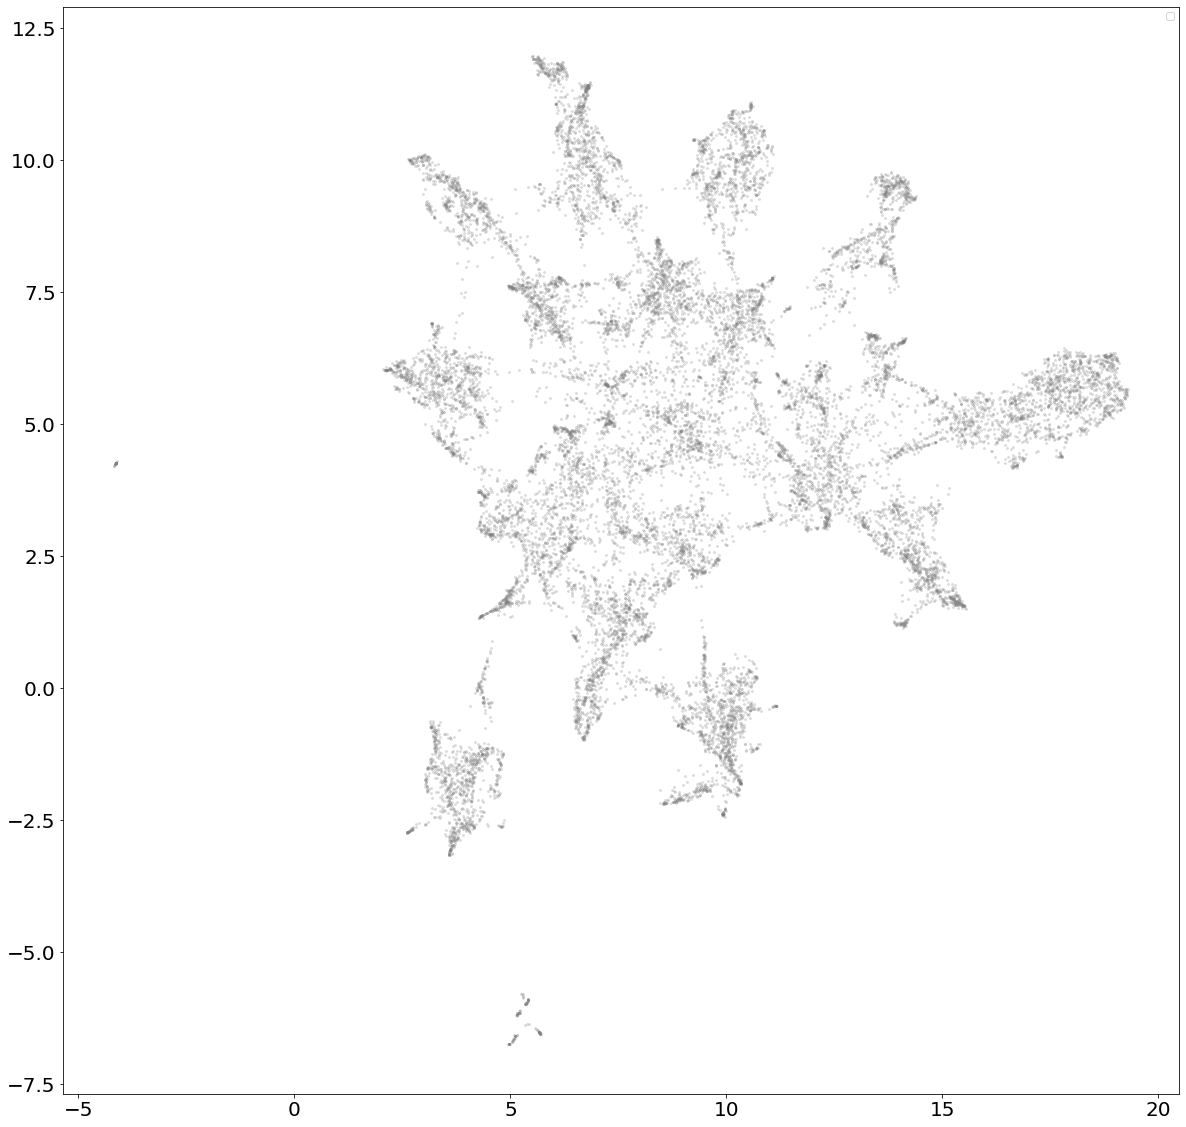

In [ ]:
visualize(tm, tm.cluster_model.labels_)

Calculating UMAP projection ...


No handles with labels found to put in legend.


Calculating UMAP projection. Done!


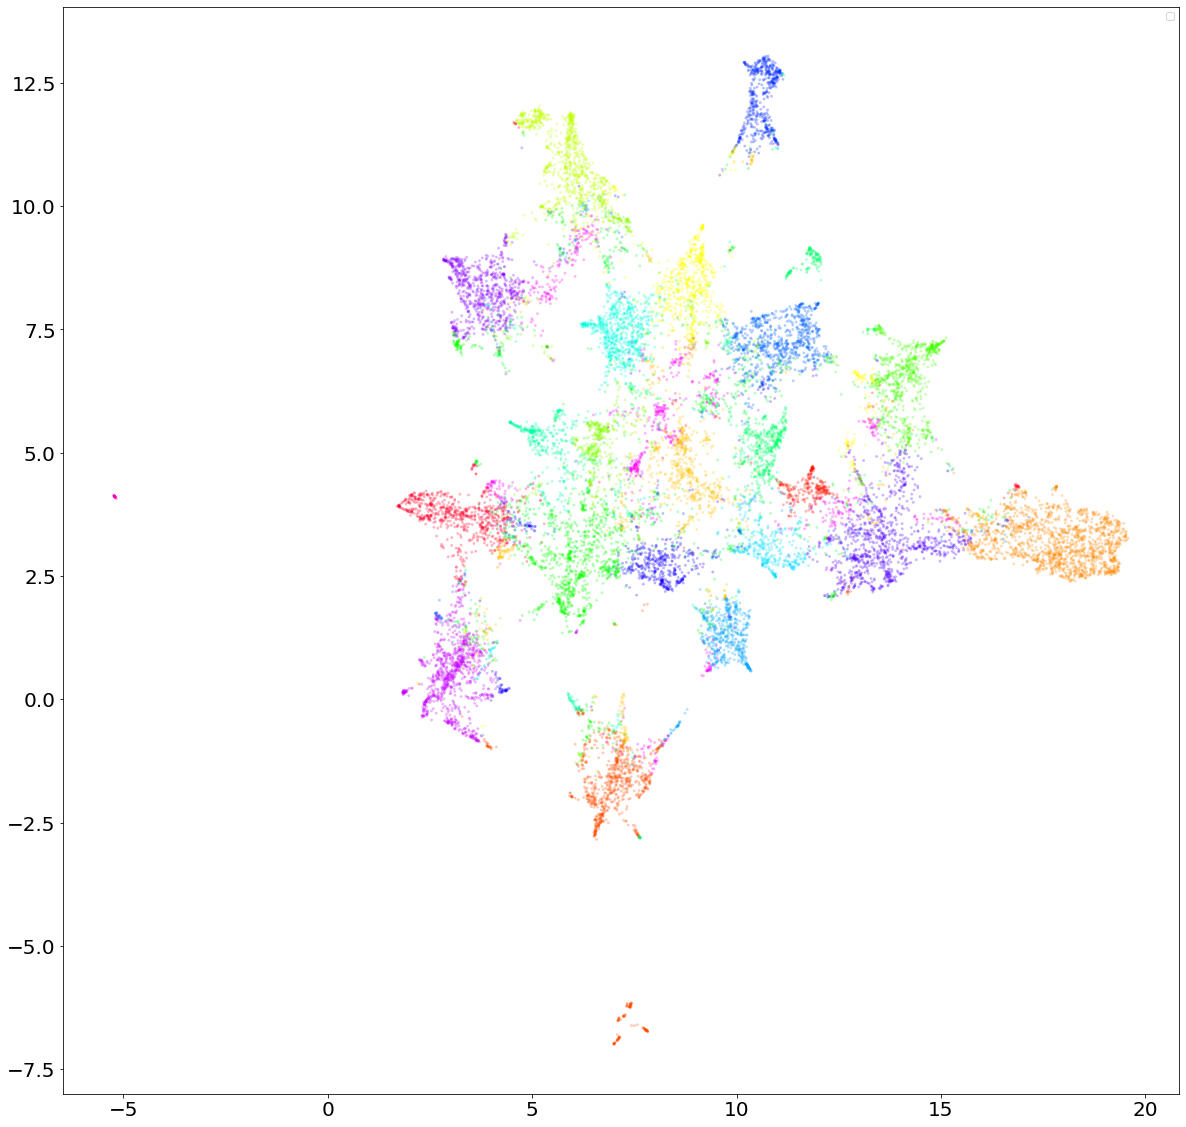

In [ ]:
visualize(tm, tm.cluster_model.labels_)

## Word frequency

In [ ]:
#KMEANS

print('Coherence:', get_coherence(tm, token_list, 'c_v'))
# visualize and save img
#visualize(tm, tm.cluster_model.labels_)
topics = []
for i in range(tm.k):
    get_wordcloud(tm, token_list, i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
np.unique(tm.cluster_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [ ]:
#HDBSCAN

print('Coherence:', get_coherence(tm, token_list, 'c_v'))
# visualize and save img
#visualize(tm, tm.cluster_model.labels_)
topics = []
for i in (np.unique(tm.cluster_model.labels_)):
    get_wordcloud(tm, token_list, i)

## CTFIDF

In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [ ]:
# Create documents per label
docs = pd.DataFrame({'Document': sentences, 'Class': tm.cluster_model.labels_})
docs_per_class = docs.groupby(['Class'], as_index=False).agg({'Document': ' '.join})

In [ ]:
# Create bag of words
count_vectorizer = CountVectorizer().fit(docs_per_class.Document)
count = count_vectorizer.transform(docs_per_class.Document)
words = count_vectorizer.get_feature_names()

# Extract top 10 words per class
vectorizer = CTFIDFVectorizer()
ctfidf = vectorizer.fit_transform(count, n_samples=len(docs))

#words_per_class = {label: [words[index] for index in ctfidf[label].argsort()[-10:]] for label in docs_per_class.Class}
dense = ctfidf.todense()
lst1 = dense.tolist()
dftfidf = pd.DataFrame(lst1, columns=words)
dftfidf.T.sum(axis=1)
dftfidf

,00,000,0000,0001,0007,000ft,000ha,000kg,000km,000km2,000m,000m2,000m3,000mbps,000nationals,000s,000sq,000t,000th,001,0010,0011,0012,0015,00187,002,0020,003,0034,0035,004,0044,005,005466,005515,005567,005579,00570,005849,006,...,眼前的任务,确保,社会或学界等利益相关方的见解,神仙怪不得,空间,而秩序良好时人们反而并不关心,联合国大会作为一个拥有,联合国大会在,联合国大会在网络安全问题上已经取得宝贵进展,联合国大会已经同意采用国际法,联合国宪章,能够有效吸引人们参与的一个特定主题,能学到的就越多,英国推崇开放且多元的世界,英国正在尽自,英国认为,要的新问题上共同努力,规范和建立信任的共同承诺,讨论中推广这一特定主题,论可以以,识报告,资助国际网络能力建设是最紧要的事情之一,这一不限成员,这个世界日益数字化已成必然,这包括借鉴区域集,这包括让所有利益相关方共同讨论如何维持一个自由,这是,这是一个高度优先的问题,这项工作的累积价值,透明,那么那些破坏规则的国家则尤,配合建立信心措施,阐明我们对网络空间法律,除率领英国代表团前往,风雨同舟,ﬁlm,ﬁnancing,ﬁrst,ﬂexible,ﬂood
0,0.000031,0.000449,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000026,0.000088,0.000026,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000089,0.000493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000007,0.000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000008,0.000271,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000006,0.000000,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
metric_coherence_gensim(measure='c_v', 
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=dtm_tf, 
                        vocab=np.array([x for x in vect.vocabulary_.keys()]), 
                        texts=train['cleaned_NOUN'].values)

cm = CoherenceModel(topics=topics, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)

NameError: ignored

In [ ]:
topic_words = pd.DataFrame(dftfidf.apply(lambda x:list(dftfidf.columns[np.array(x).argsort()[::-1][:20]]), axis=1).to_list())
topic_words

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,tax,customers,housing,payment,payments,providers,tenants,loan,price,scheme,property,suppliers,cma,contract,homes,landlords,2020,pay,april,self
1,appointments,board,appointment,appointed,she,chair,executive,he,member,committee,commissioner,director,her,chief,panel,experience,non,role,declared,roles
2,test,testing,virus,tests,trace,symptoms,cases,nhs,sentence,spread,coronavirus,isolate,prison,court,covid,transmission,tracing,app,contacts,week
3,foreign,prime,relationship,trade,visit,cooperation,ghana,bilateral,minister,ambassador,commonwealth,countries,india,discussed,meeting,africa,partnership,shared,summit,leaders
4,export,exports,tech,trade,growth,investment,markets,exporting,businesses,finance,opportunities,companies,dit,business,market,africa,economy,jobs,innovation,billion
5,highways,road,rail,transport,roads,drivers,traffic,journeys,homes,england,network,passengers,railway,vehicles,0300,motorway,press,vehicle,station,7944
6,employers,employment,skills,apprenticeship,women,apprentices,jobs,pay,apprenticeships,job,wage,gender,workers,scotland,scheme,diversity,workplace,rate,career,equality
7,wildlife,marine,natural,plastic,trees,species,sellafield,nature,project,conservation,environment,waste,projects,site,habitats,environmental,woodland,fund,tree,plant
8,cyber,competition,online,security,police,5g,digital,chemical,weapons,de,review,cma,data,safety,home,speaker,law,my,industry,policy
9,insolvency,disqualification,company,ism,recognised,limited,detention,enquiries,receiver,court,organisation,liquidation,deficiencies,official,directors,date,ltd,1743,service,003


https://www.gov.uk/search/news-and-communications?keywords=report&level_one_taxon=e48ab80a-de80-4e83-bf59-26316856a5f9&order=relevance

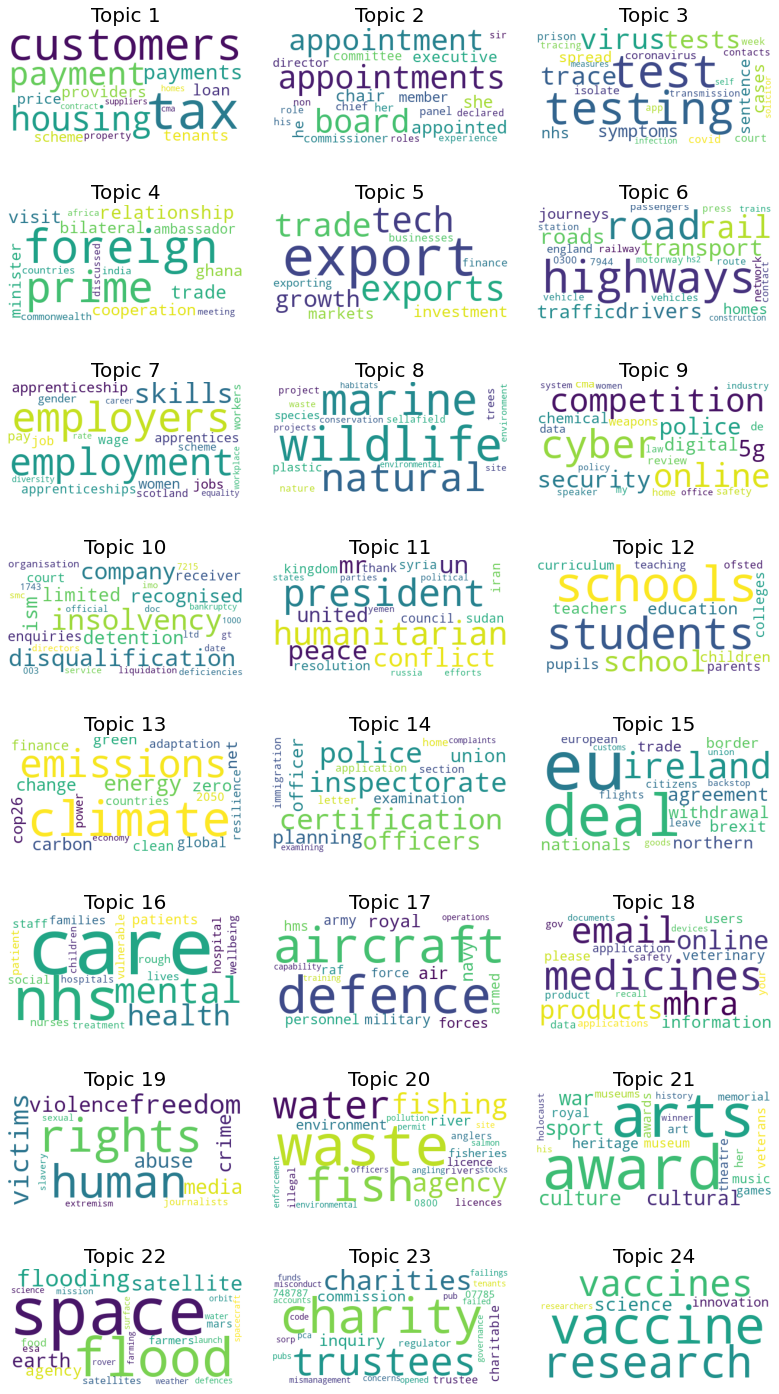

In [ ]:
fig=plt.figure(figsize=(20, 25))
plt.subplots_adjust(hspace=0.5, wspace=-.55)
columns = 3
rows = 8
for i in range(1, columns*rows+1):
  cloud = WordCloud(background_color='white', collocations=False, min_font_size=14).generate_from_frequencies(dftfidf.loc[i-1])
  ax = fig.add_subplot(rows, columns, i)
  ax.title.set_text('Topic ' + str(i))
  ax.title.set_fontsize(20)
  ax.axis("off")
  ax.imshow(cloud)
plt.show()

In [ ]:
for i in (np.unique(tm.cluster_model.labels_)):
  Cloud = WordCloud(background_color="white").generate_from_frequencies(dftfidf.loc[i])
  fig = plt.figure(figsize=(10, 5), facecolor=None)
  fig.suptitle('topic ' + str(i), fontsize=20)
  plt.imshow(Cloud)

Output hidden; open in https://colab.research.google.com to view.

# Frequenza topic

In [ ]:
df2

,index,date,title,link,text,label
0,1,2021-03-04,Project Servator goes live at Heysham – trust ...,https://www.gov.uk/government/news/project-ser...,Project Servator tactics are used by 23 UK pol...,5
1,3,2021-03-04,Change of Her Majesty’s Ambassador to Chad: Ma...,https://www.gov.uk/government/news/change-of-h...,Mr Mark Matthews has been appointed Her Majest...,2
2,4,2021-03-04,Jeff Halliwell appointed Chair of the Coal Aut...,https://www.gov.uk/government/news/jeff-halliw...,Jeff Halliwell has been appointed as Chair of ...,6
3,5,2021-03-04,Change of British High Commissioner to Cameroo...,https://www.gov.uk/government/news/change-of-b...,Dr Christian Dennys-McClure has been appointed...,2
4,6,2021-03-04,Alok Sharma welcomes UK-Bangladesh Climate Par...,https://www.gov.uk/government/news/alok-sharma...,During the last session of the UK-Bangladesh C...,9
...,...,...,...,...,...,...
18163,19995,2018-10-05,FCO Press Release: Minister for the Middle Ea...,https://www.gov.uk/government/news/fco-press-r...,"The Joint Working Group, which takes place on ...",12
18164,19996,2018-10-05,African swine fever risk reminder,https://www.gov.uk/government/news/african-swi...,Read the guidance on for the latest informat...,3
18165,19997,2018-10-05,Using the PHSKF to merge public health teams,https://www.gov.uk/government/case-studies/usi...,In Spring 2017 it was agreed that the Bedford ...,7
18166,19998,2018-10-05,Baroness Stowell: The Future of Charity,https://www.gov.uk/government/speeches/barones...,"Good evening, I’m delighted to be here, and I ...",1


In [ ]:
len(np.unique(tm.cluster_model.labels_))

20

In [ ]:
np.unique(tm.cluster_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

TypeError: ignored

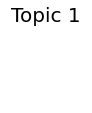

In [ ]:
fig=plt.figure(figsize=(20, 25))
plt.subplots_adjust(hspace=0.5, wspace=-.55)
columns = 2
rows = 12
df2['label'] = tm.cluster_model.labels_
for i in range(1, columns*rows):
  im = (df2.loc[df2.label == label].groupby([df2['date'].dt.year.rename('year'), df2['date'].dt.month.rename('month')]).text.count()).plot(figsize=(10,60), ax=axes.flat[i], kind='bar', title="topic " + str(label))
  ax = fig.add_subplot(rows, columns, i)
  ax.title.set_text('Topic ' + str(i))
  ax.title.set_fontsize(20)
  ax.axis("off")
  ax.imshow(im)
plt.show()

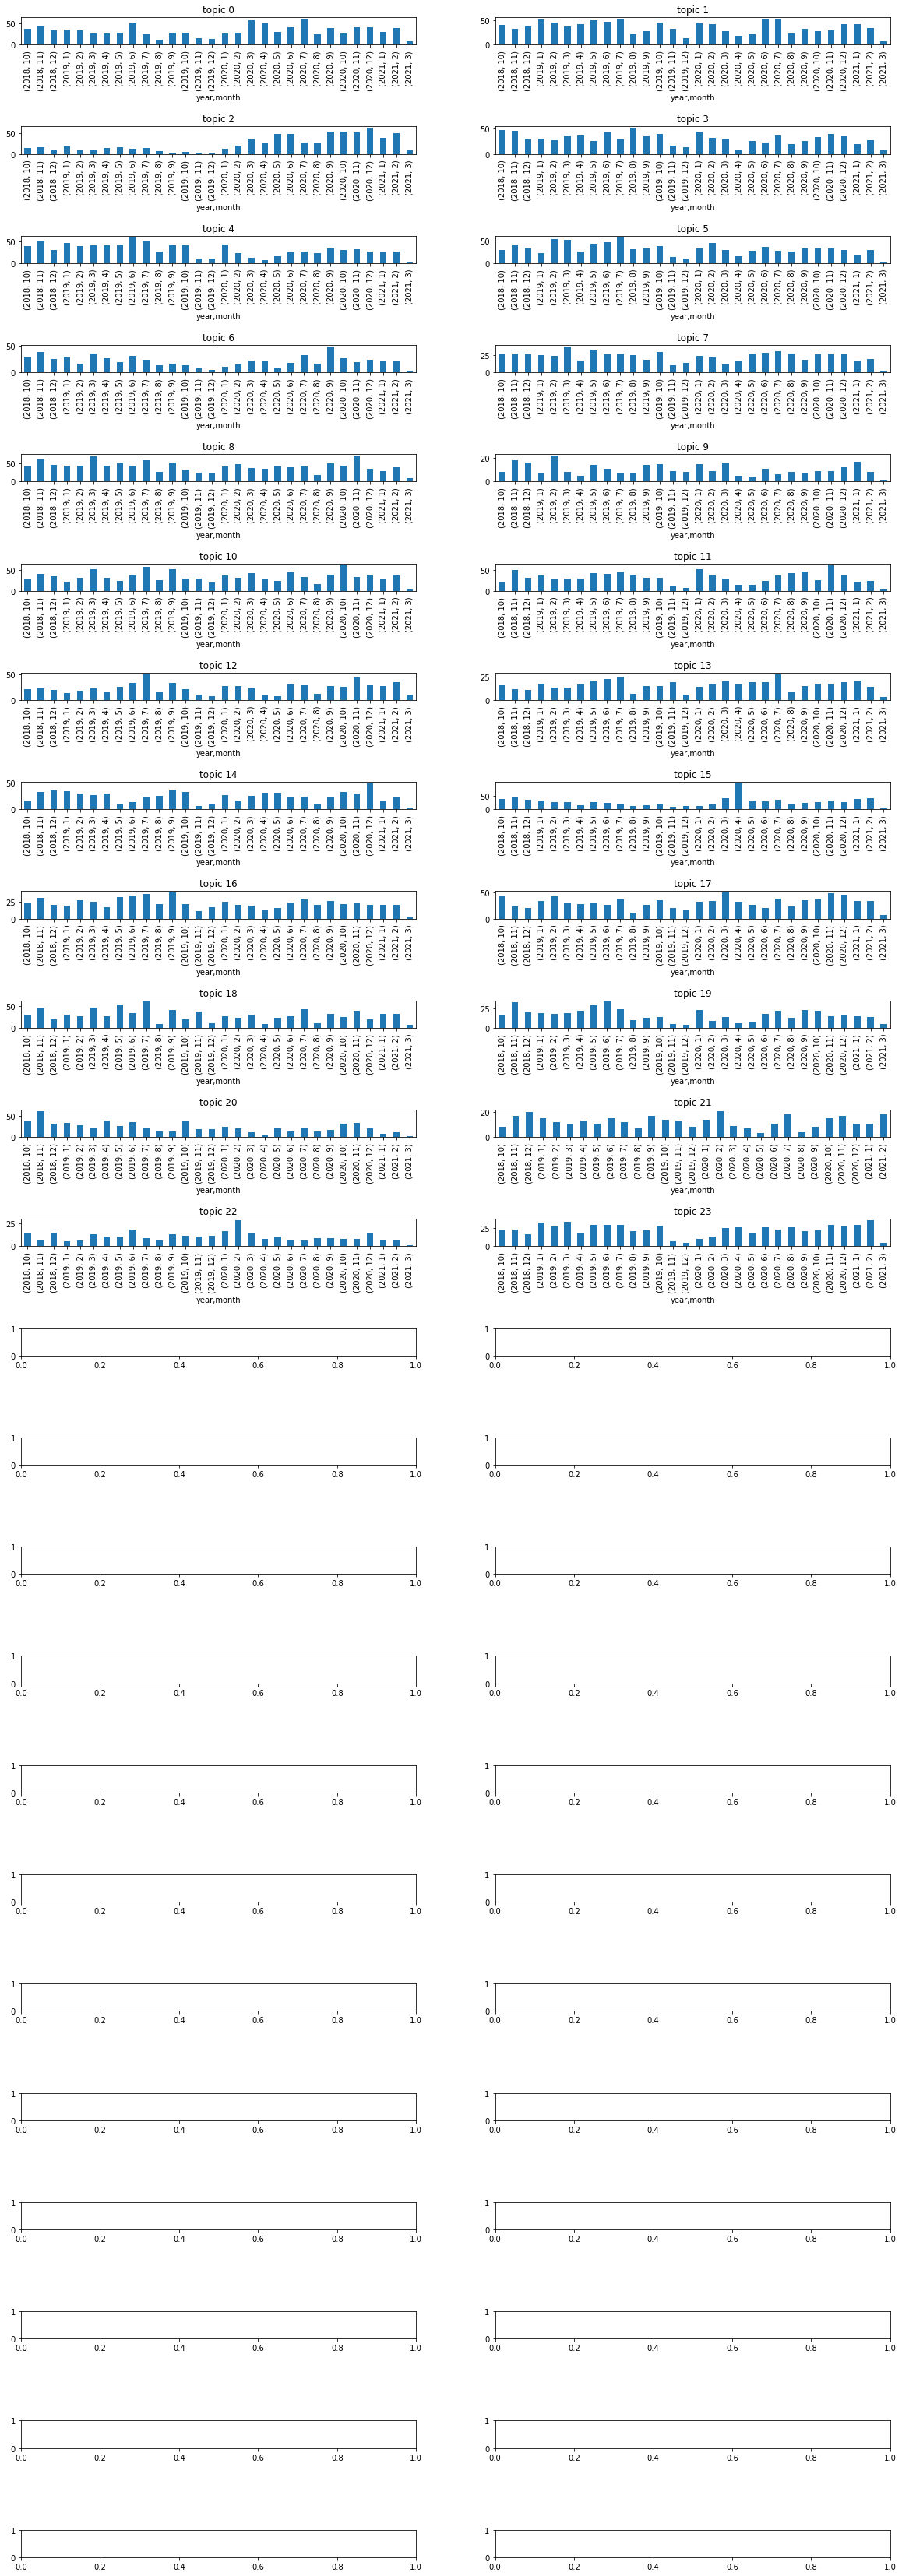

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(np.unique(tm.cluster_model.labels_)), ncols=2)
fig.subplots_adjust(hspace=3)
df2['label'] = tm.cluster_model.labels_
for i, label in enumerate(np.unique(tm.cluster_model.labels_)):
  (df2.loc[df2.label == label].groupby([df2['date'].dt.year.rename('year'), df2['date'].dt.month.rename('month')]).text.count()).plot(figsize=(20,60), ax=axes.flat[i], kind='bar', title="topic " + str(label))

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(df.original_labels.tolist(), tm.cluster_model.labels_)

AttributeError: ignored

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df2.original_labels.tolist(), df2.lda_bert.tolist())

0.32281413773735773

In [ ]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df2.original_labels.tolist(), df2.lda_bert.tolist())

1.0830282594103322

# LDA

In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')
# list for tokenized documents in loop
texts = []

# loop through document list
for i in df.text.tolist():
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

In [ ]:
for i in ldamodel.show_topics(num_topics=10, num_words=20, log=False, formatted=False):
  topic = []
  for j in i[1]:
    topic.append(j[0])
  print(topic)

['s', 'peopl', 'can', 'will', 'work', 'need', 'year', 'school', 'make', 'want', 'support', 'educ', 'us', 'one', 'children', 'time', 'help', 't', 'also', 'mani']
['will', 'inform', 'use', 'report', 'chariti', 'public', 'provid', 'review', 's', 'work', 'regul', 'includ', 'requir', 'issu', 'can', 'may', 'also', 'publish', 'process', 'respons']
['will', 'environ', 'flood', 'water', 'help', 'natur', 'protect', 's', 'fund', 'million', 'research', 'uk', 'work', 'agenc', 'year', 'project', 'climat', 'develop', 'new', 'fish']
['will', 'test', 'health', 'nh', 'peopl', 'covid', 'coronaviru', 'care', '19', 'work', 'uk', 'can', 'viru', 'vaccin', 'govern', 'continu', 'patient', 'protect', 'social', 'safe']
['uk', 'trade', 's', 'will', 'british', 'minist', 'intern', 'eu', 'busi', 'world', 'countri', 'govern', 'agreement', 'export', 'year', 'new', 'global', 'appoint', 'work', 'also']
['uk', 'will', 's', 'technolog', 'develop', 'new', 'innov', 'space', 'industri', 'world', 'invest', 'project', 'defenc'

# TOP2VEC

In [ ]:
!pip install top2vec[sentence_encoders]

  Using cached https://files.pythonhosted.org/packages/70/8a/064b4077e3d793f877e3b77aa64f56fa49a4d37236a53f78ee28be009a16/numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl
     |████████████████████████████████| 3.4MB 19.6MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: jaxlib 0.1.60+cuda101 has requirement numpy<1.20,>=1.12, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
from top2vec import Top2Vec

model = Top2Vec(df.text.tolist(), embedding_model='universal-sentence-encoder-multilingual')

2021-03-03 12:44:56,317 - top2vec - INFO - Pre-processing documents for training
2021-03-03 12:45:08,227 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder-multilingual/3, Total size: 266.88MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'.
2021-03-03 12:45:13,618 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-03-03 12:45:34,930 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-03-03 12:46:02,237 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-03-03 12:46:02,509 - top2vec - 

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(10)

In [ ]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)